# EcoFOCIpy ADCP QC - 19CKP-12A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt

In [2]:
adcp_file='19ckp5a_0038m.nc'

In [3]:
xdf = xa.load_dataset(adcp_file)

In [4]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 24897, depth: 13)
Coordinates:
  * time             (time) datetime64[ns] 2019-08-20T05:00:00 ... 2021-01-19...
  * depth            (depth) float64 -16.0 -12.0 -8.0 -4.0 ... 24.0 28.0 32.0
  * latitude         (latitude) float64 71.2
  * longitude        (longitude) float64 -158.0
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 26.58 ... -62.65
    v_curr_comp      (latitude, longitude, time, depth) float64 -37.25 ... 6.398
    w_curr_comp      (latitude, longitude, time, depth) float64 -0.5 ... 0.2
    w_curr_comp_err  (latitude, longitude, time, depth) float64 3.8 3.3 ... -0.1
    agc1             (latitude, longitude, time, depth) float64 94.0 ... 118.0
    agc2             (latitude, longitude, time, depth) float64 86.0 ... 109.0
    agc3             (latitude, longitude, time, depth) float64 94.0 ... 120.0
    agc4             (latitude, longitude, time, depth) float64 95.0 ... 120.0
Attributes: (12/13)
    Latitude_DegMMddW:                      71 12.22 N
    Longitude_DegMMddN:                     158 00.722 W
    MooringID:                              19CKP-5A
    platform_deployment_date:               2019-08-20T04:55:00Z
    platform_deployment_cruise_name:        OS1901
    platform_recovery_date:                 2021-10-31T22:25:00Z
    ...                                     ...
    platform_deployment_recovery_comments:  Recovered on Sikuliaq by Craig Lee
    WaterDepth:                             48.0
    date_created:                           2022-06-10T11:51:37Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [5]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

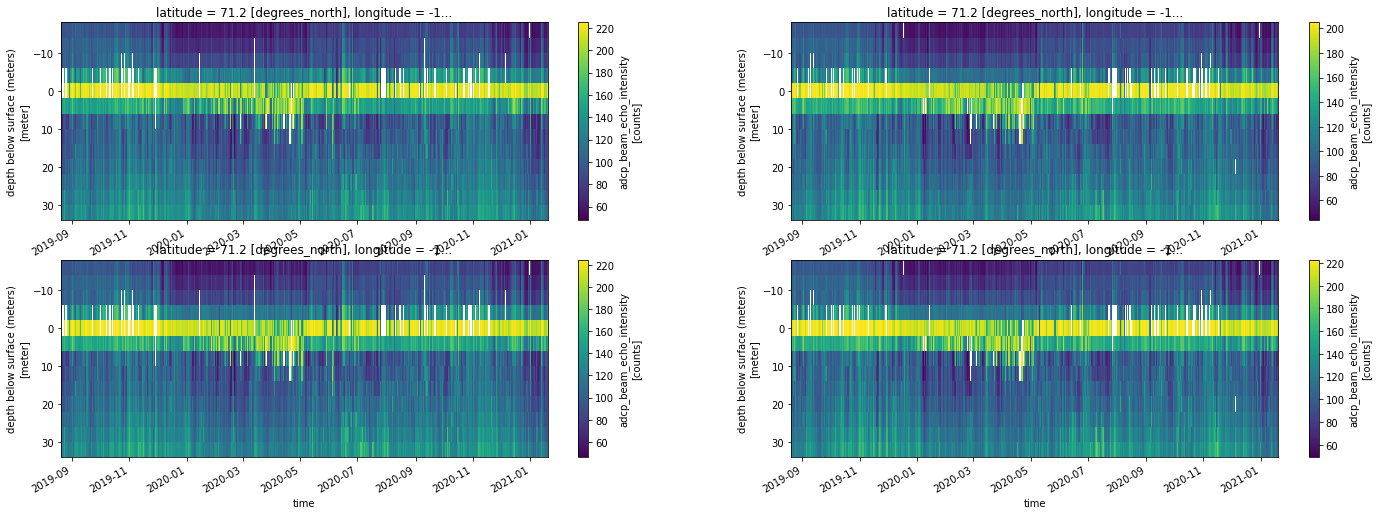

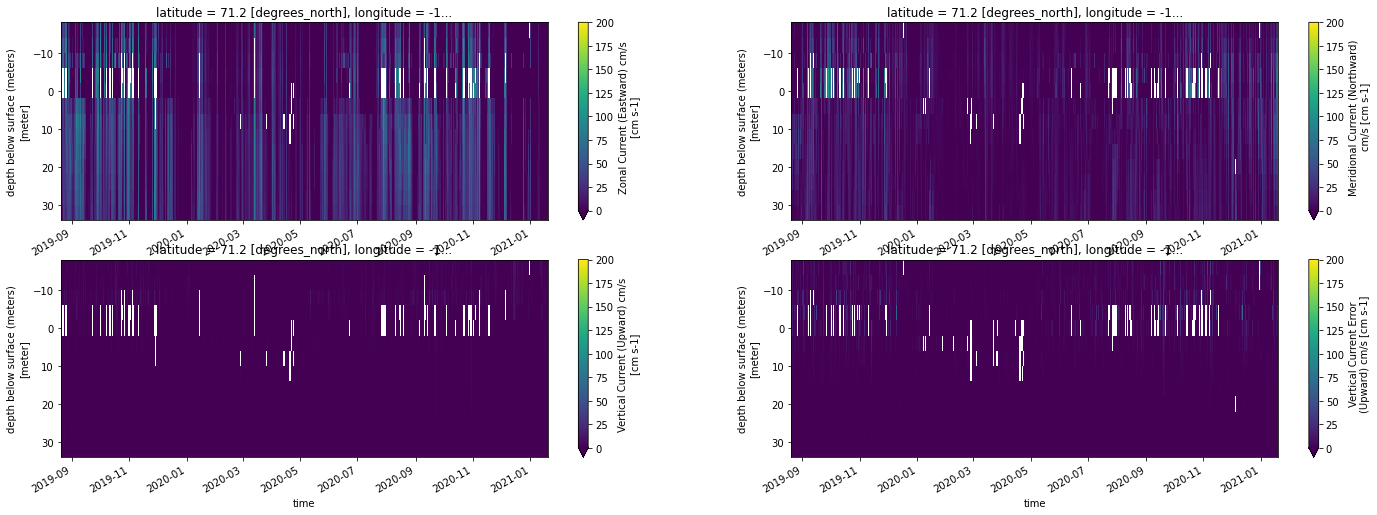

In [6]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [7]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

## Trim above surface (negative values)

In [8]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [9]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [10]:
ixdf.to_netcdf(adcp_file.replace('.nc','.trimmed.nc'))

In [11]:
xdf = xa.load_dataset(adcp_file.replace('.nc','.trimmed.nc'))

In [12]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [13]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

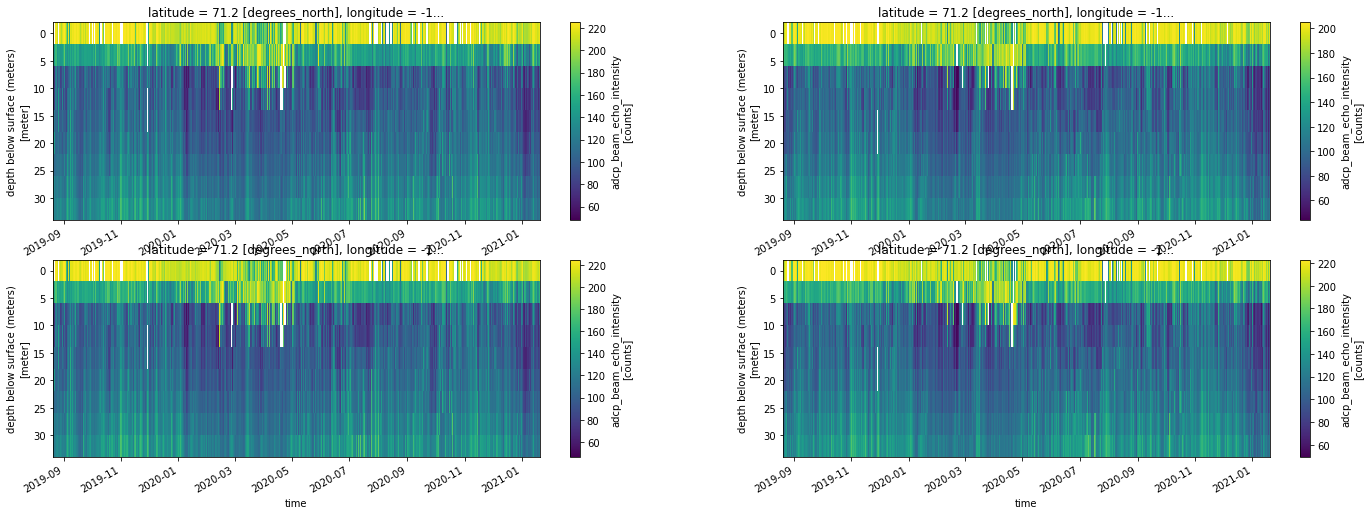

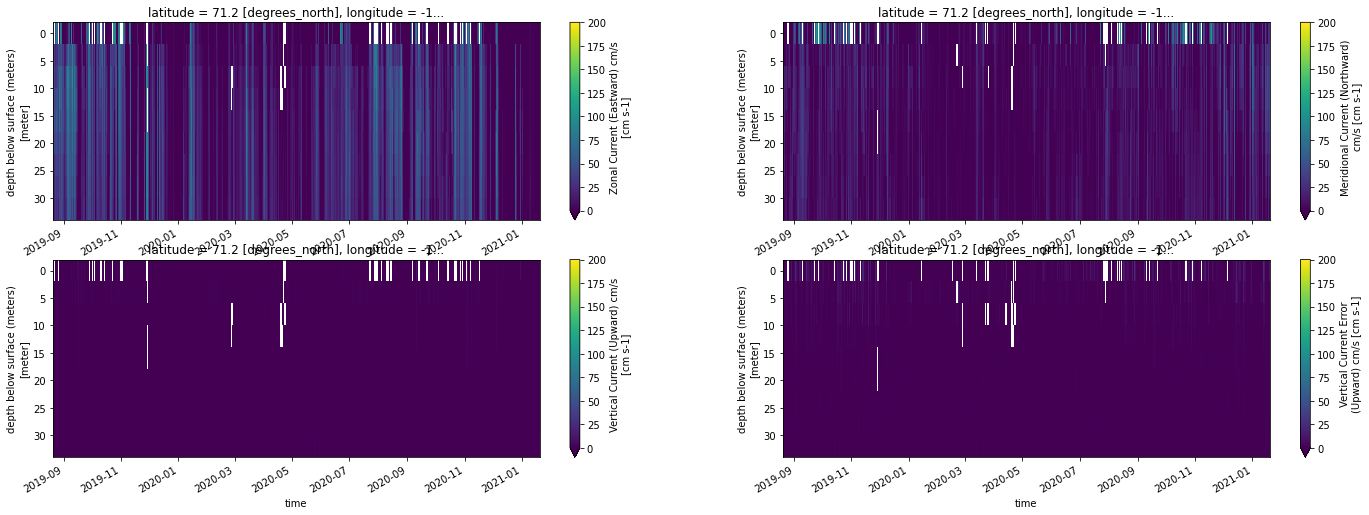

In [14]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [15]:
ixdf.to_netcdf(adcp_file.replace('.nc','.filtered.nc'))